# Google Landmark Recognition - Image Exploration

In [1]:
%reload_ext autoreload
%autoreload 2

from collections import defaultdict

import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

In [2]:
def ceildiv(a, b):
    return -(-a // b)

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None, maintitle=None):
    """Function for plotting a bunch of images from fastai."""
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3): ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    if maintitle is not None:
        plt.suptitle(maintitle, fontsize=16)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, ceildiv(len(ims), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

This notebook will walk through the provided image set (already downloaded using [this](https://www.kaggle.com/anokas/py3-image-downloader-w-progress-bar) script.

In [3]:
PATH = 'data/'

In [4]:
!ls -l {PATH}

total 261756
-rw-r--r-- 1 lex lex   3194035 Feb  1 20:45 sample_submission.csv
-rw-rw-r-- 1 lex lex   1614046 Apr  2 23:59 sample_submission.csv.zip
-rw-r--r-- 1 lex lex  16070633 Feb  1 16:17 test.csv
-rw-rw-r-- 1 lex lex   7059782 Apr  2 23:59 test.csv.zip
drwxrwxr-x 2 lex lex  49557504 Apr  3 21:33 train
-rw-r--r-- 1 lex lex 133635400 Feb  1 16:17 train.csv
-rw-rw-r-- 1 lex lex  56889539 Apr  2 23:59 train.csv.zip


In [5]:
df = pd.read_csv(f'{PATH}train.csv')

In [6]:
df.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


## Random images

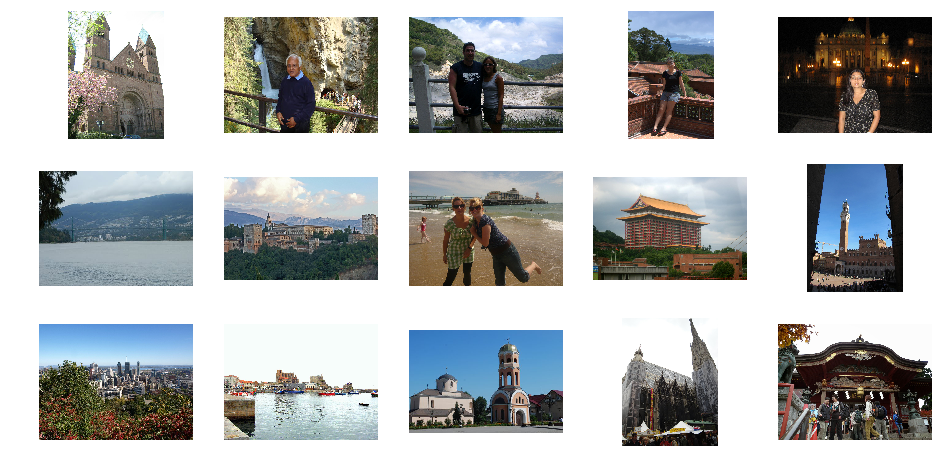

In [7]:
plots([Image.open(f'{PATH}train/{img_id}.jpg') for img_id in df.sample(n=15).id.values], rows=3, figsize=(16,8))

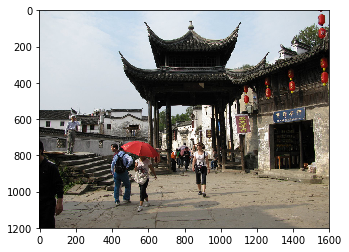

In [8]:
img_id = df[df.index==2].id.values[0]
plt.imshow(Image.open(f'{PATH}train/{img_id}.jpg'))

## Images from the same landmarks

Take a sample of a number of Landmark ids, then plot images with the same Landmarks.

In [9]:
landmark_ids = df.sample(n=3).landmark_id.values

In [10]:
imgs_by_landmark = defaultdict(list)

for landmark_id in landmark_ids:
    img_ids = df[df.landmark_id == landmark_id].id.values
    for img_id in img_ids[:10]: 
        try:
            imgs_by_landmark[landmark_id].append(Image.open(f'{PATH}train/{img_id}.jpg'))
        except (FileNotFoundError, OSError):
            pass

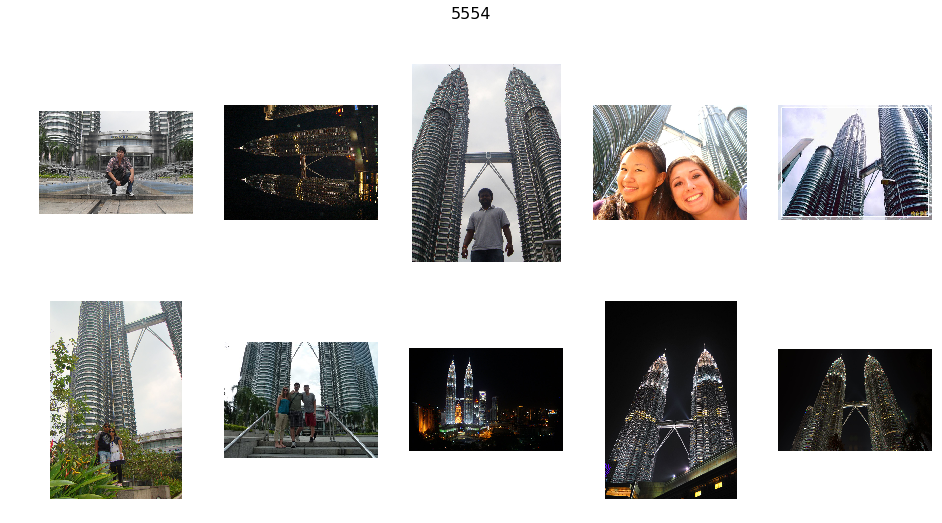

In [11]:
plots(imgs_by_landmark[landmark_ids[0]], figsize=(16,8), rows=2, maintitle=landmark_ids[0])

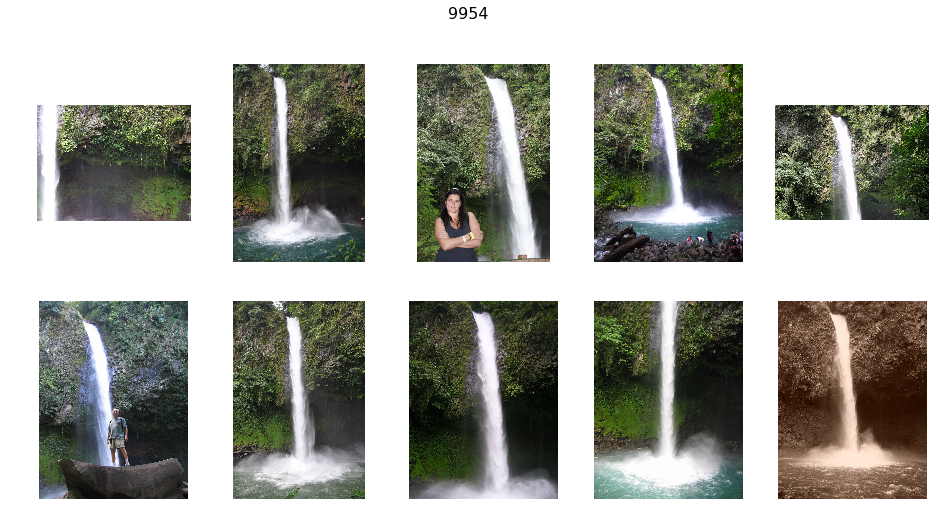

In [12]:
plots(imgs_by_landmark[landmark_ids[1]], figsize=(16,8), rows=2, maintitle=landmark_ids[1])

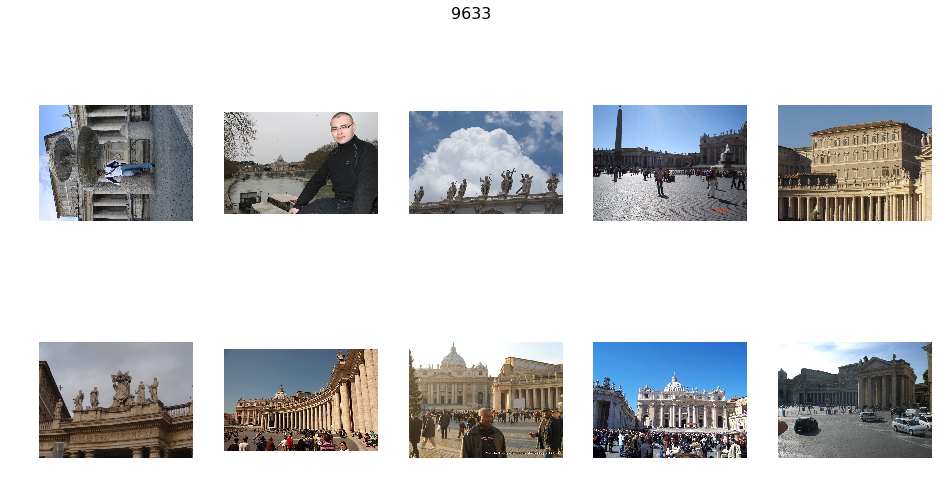

In [13]:
plots(imgs_by_landmark[landmark_ids[2]], figsize=(16,8), rows=2, maintitle=landmark_ids[2])

## Height/width distribution

Let's take a sample of the images and use to plot height and width metrics.

In [14]:
heights = []
widths = []

for img_id in df.sample(n=100000).id.values:
    try:
        height, width = Image.open(f'{PATH}train/{img_id}.jpg').size
    except (FileNotFoundError, OSError):
        continue
        
    heights.append(height)
    widths.append(width)

(array([2.5393e+04, 2.7910e+04, 4.4937e+04, 1.8100e+02, 2.1000e+02,
        1.2200e+02, 5.9000e+01, 1.5000e+01, 3.0000e+00, 2.0000e+00]),
 array([  10. ,  709.5, 1409. , 2108.5, 2808. , 3507.5, 4207. , 4906.5,
        5606. , 6305.5, 7005. ]),
 <a list of 10 Patch objects>)

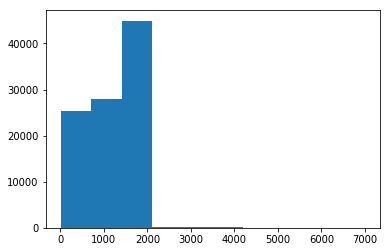

In [15]:
plt.hist(heights)

(array([2.3492e+04, 2.7057e+04, 4.7602e+04, 2.4600e+02, 1.9600e+02,
        1.4800e+02, 5.7000e+01, 2.0000e+01, 8.0000e+00, 6.0000e+00]),
 array([  15. ,  550.9, 1086.8, 1622.7, 2158.6, 2694.5, 3230.4, 3766.3,
        4302.2, 4838.1, 5374. ]),
 <a list of 10 Patch objects>)

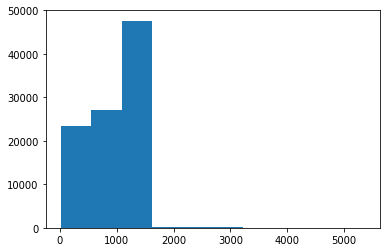

In [16]:
plt.hist(widths)

So, images are generally in the 1k - 2k range for both width and height.

## Landmark frequencies

### Most frequent landmarks

In [25]:
most_freq = pd.DataFrame(df.landmark_id.value_counts().head(8))

In [30]:
imgs = []
img_ids = df[df.landmark_id == most_freq.index[0]].id.values
for img_id in img_ids[:10]: 
    try:
        imgs.append(Image.open(f'{PATH}train/{img_id}.jpg'))
    except (FileNotFoundError, OSError):
        pass

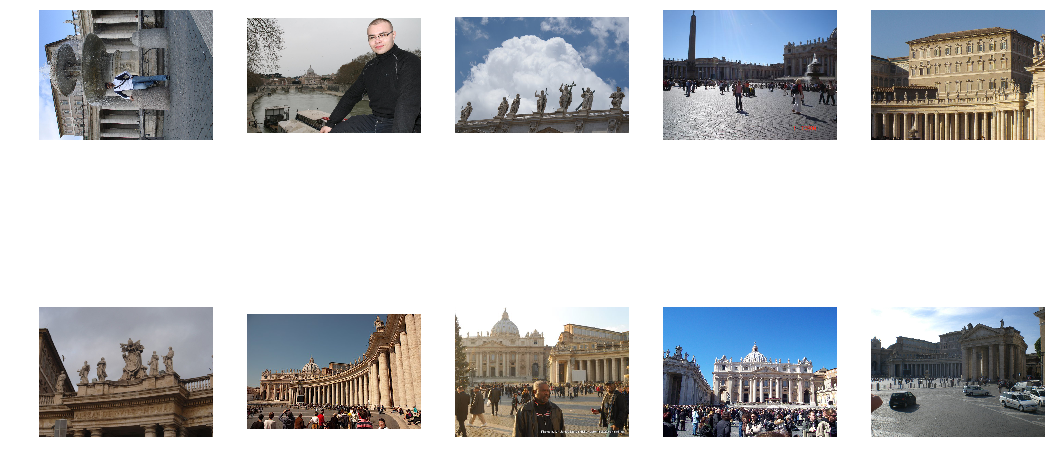

In [34]:
plots(imgs, figsize=(18,10), rows=2)

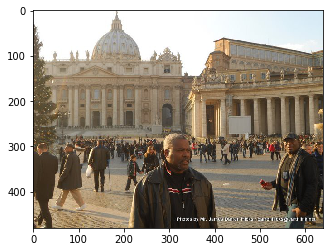

In [35]:
plt.imshow(imgs[7])

### Distribution

In [36]:
frequencies = pd.DataFrame(df.landmark_id.value_counts())

(array([ 159.,  291.,  631.,  999., 1314.,  950.,  764.,  557.,  500.,
         394.,  332.,  274.,  287.,  229.,  212.,  212.,  198.,  177.,
         153.,  164.,  155.,  155.,  133.,  150.,  148.,  132.,   92.,
         108.,   96.,  120.,   95.,   94.,  118.,   83.,   93.,   85.,
          85.,   69.,   55.,   48.,   60.,   58.,   59.,   62.,   50.,
          56.,   49.,   60.,   61.,    0.,   58.,   62.,   46.,   37.,
          53.,   44.,   48.,   37.,   40.,   36.,   35.,   33.,   31.,
          38.,   39.,   39.,   46.,   32.,   38.,   23.,   38.,   22.,
          28.,   35.,   16.,   25.,   37.,   23.,   20.,   26.,   19.,
          22.,   24.,   27.,   28.,   19.,   23.,   20.,   25.,   23.,
          16.,   16.,   24.,   20.,   17.,   22.,   15.,   14.,   15.,
          15.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.

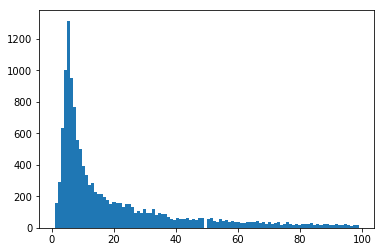

In [52]:
plt.hist([f for f in frequencies.landmark_id if f < 100], bins=100)

So the vast majority appear to have around 10 per category. Likely means this calls for a Siamese Network type solution, especially since the test set doesn't have any overlap with the training set.